<a href="https://colab.research.google.com/github/AMROAMRO404/AAA/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Description**

In [ ]:
# Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Salaries.csv", index_col=0)

# Display dimensions of dataframe
print(df.shape)
print(df.info())

print("-----------------------------------------------------------------------")
# Display first 10 records
print(df.head(10))

print("-----------------------------------------------------------------------")
# Display last 10 records
print(df.tail(10))

print("-----------------------------------------------------------------------")
# List types of all columns
print(df.dtypes)

print("-----------------------------------------------------------------------")
# List the column names
print(df.columns)


(397, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.7+ KB
None
-----------------------------------------------------------------------
         rank discipline  yrs.since.phd  yrs.service     sex  salary
1        Prof          B             19           18    Male  139750
2        Prof          B             20           16    Male  173200
3    AsstProf          B              4            3    Male   79750
4        Prof          B             45           39    Male  115000
5        Prof          B             40           41    Male  141500
6

       yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000
-----------------------------------------------------------------------


yrs.since.phd :
count    397.000000
mean      22.314861
std       12.887003
min        1.000000
25%       12.000000
50%       21.000000
75%       32.000000
max       56.000000
Name: yrs.since.phd, dtype: float64
-----------------------------------------------------------------------


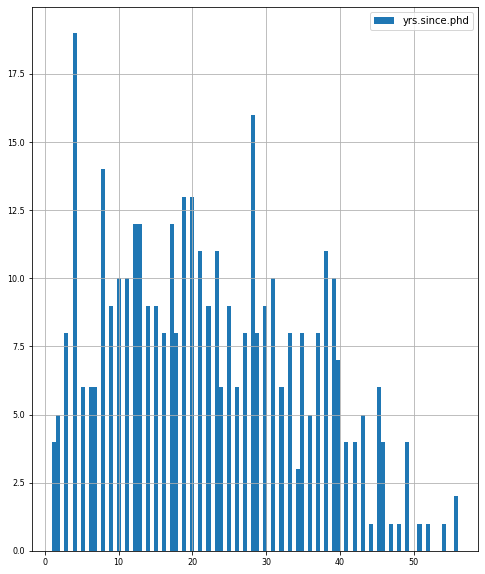

In [ ]:
# Display statistics for numeric columns
print(df.describe())

print("-----------------------------------------------------------------------")
print("\n")
print("yrs.since.phd :")
print(df["yrs.since.phd"].describe())

print("-----------------------------------------------------------------------")
df["yrs.since.phd"].hist(figsize=(8, 10), bins=100, legend=True, xlabelsize=8, ylabelsize=8)


In [ ]:
# Numerical data distribution
# First list all the types of our data from our dataset and take only the numerical ones
print("All types : ",list(set(df.dtypes.tolist())))

print("-----------------------------------------------------------------------")
df_num = df.select_dtypes(include = ["int64"]) # 'float64', 'int64'
print(df_num.head(5))


All types :  [dtype('int64'), dtype('O')]
-----------------------------------------------------------------------
   yrs.since.phd  yrs.service  salary
1             19           18  139750
2             20           16  173200
3              4            3   79750
4             45           39  115000
5             40           41  141500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f28be8d0>,
      dtype=object)

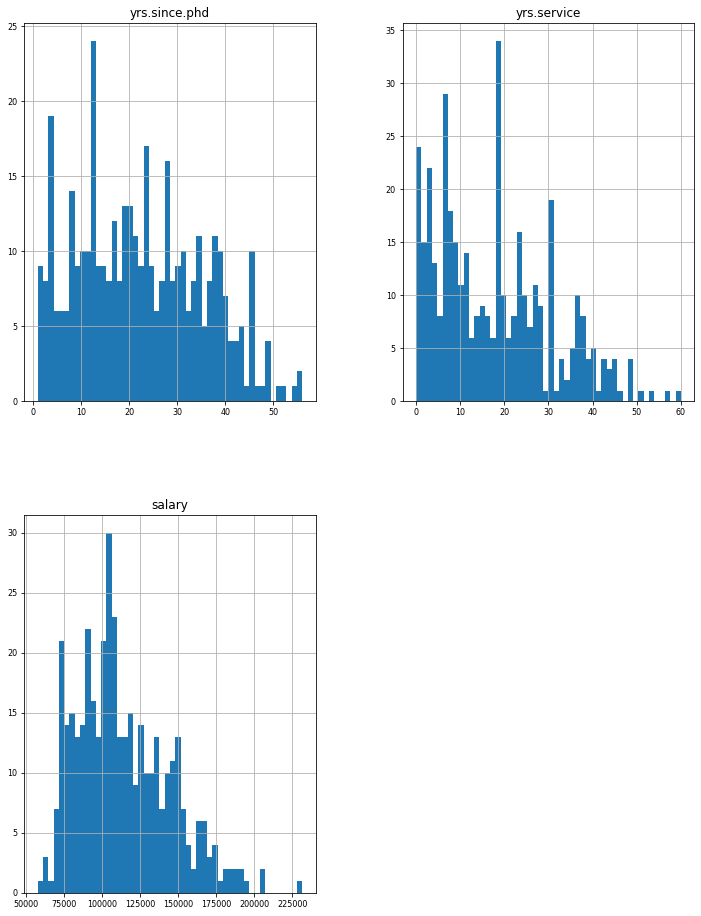

In [ ]:
# Now lets plot them all
df_num.hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8)
# df.hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8)

               yrs.since.phd  yrs.service    salary
yrs.since.phd       1.000000     0.909649  0.419231
yrs.service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000
-----------------------------------------------------------------------




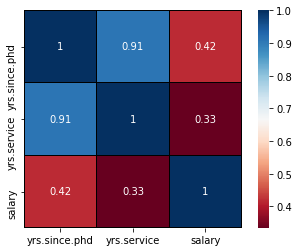

In [ ]:
# Find the pairwise correlation of all columns in the dataframe.
print(df.corr())

print("-----------------------------------------------------------------------")
# Heatmap
print("\n")
corrMatrix = df.corr()
# sns.heatmap(corrMatrix, annot=True)
sns.heatmap(corrMatrix, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


mean : 
 yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64
-----------------------------------------------------------------------
sex        : 
 Male      358
Female     39
Name: sex, dtype: int64


discipline : 
 B    216
A    181
Name: discipline, dtype: int64
-----------------------------------------------------------------------
Male      0.901763
Female    0.098237
Name: sex, dtype: float64


B    0.544081
A    0.455919
Name: discipline, dtype: float64


-----------------------------------------------------------------------


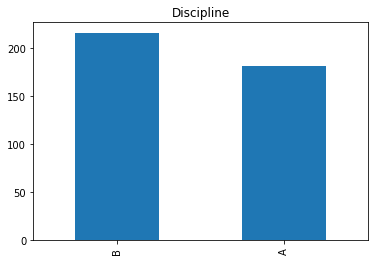

In [ ]:
# Calculate mean for all numeric columns
print("mean : \n",df.mean())

print("-----------------------------------------------------------------------")
# value_counts() function : Return a Series containing counts of unique values.
print("sex        : \n",df["sex"].value_counts())
print("\n")
print("discipline : \n",df["discipline"].value_counts()) 

print("-----------------------------------------------------------------------")
# (normalize=True) means the object returned will contain the relative frequencies of the unique values.
print(df["sex"].value_counts(normalize=True))
print("\n")
print(df["discipline"].value_counts(normalize=True))
print("\n")

print("-----------------------------------------------------------------------")
# plot.bar(title='') function is used to plot bargraph 
# df["sex"].value_counts().plot.bar(title="Sex")

"""
sns.set(font_scale=1.4)
df["sex"].value_counts().plot(kind="bar", figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02);
"""

df["discipline"].value_counts().plot.bar(title="Discipline")


In [ ]:
df_copy = df.copy()

# Drop features
df_copy = df_copy.drop(["rank" , "yrs.since.phd"], axis = 1)
print(df_copy.head(5))


  discipline  yrs.service   sex  salary
1          B           18  Male  139750
2          B           16  Male  173200
3          B            3  Male   79750
4          B           39  Male  115000
5          B           41  Male  141500


In [ ]:
df_copy = df.copy()
print(df_copy.head())
print("-----------------------------------------------------------------------")
# By replace() function we replace the value "B" with "C" in discipline column
print("\n")
df_copy["discipline"] = df_copy["discipline"].replace("B", "C") 
print(df_copy.head())


       rank discipline  yrs.since.phd  yrs.service   sex  salary
1      Prof          B             19           18  Male  139750
2      Prof          B             20           16  Male  173200
3  AsstProf          B              4            3  Male   79750
4      Prof          B             45           39  Male  115000
5      Prof          B             40           41  Male  141500
-----------------------------------------------------------------------


       rank discipline  yrs.since.phd  yrs.service   sex  salary
1      Prof          C             19           18  Male  139750
2      Prof          C             20           16  Male  173200
3  AsstProf          C              4            3  Male   79750
4      Prof          C             45           39  Male  115000
5      Prof          C             40           41  Male  141500


In [ ]:
df_copy = df.copy()

# Dropping the duplicate rows
duplicate_rows = df_copy[df_copy.duplicated()]
print("number of duplicate rows (before) : ",duplicate_rows.shape)

df_copy.drop_duplicates(inplace=True)
duplicate_rows = df_copy[df_copy.duplicated()]
print("number of duplicate rows (after) : ",duplicate_rows.shape)
print("shape : ",df_copy.shape)


number of duplicate rows (before) :  (4, 6)
number of duplicate rows (after) :  (0, 6)
shape :  (393, 6)


In [ ]:
# Fill null values with mean
print("null values : \n",df.isnull().sum()) 

# df["yrs.since.phd"] = df["yrs.since.phd"].fillna(df["yrs.since.phd"].mean())
# df["yrs.service"] = df["yrs.service"].fillna(df["yrs.service"].interpolate())


null values : 
 rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


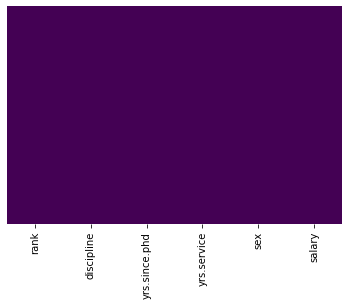

In [ ]:
# To check Missing Values 
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [ ]:
# Sort the data frame by salary and create a new data frame
# df.sort_values(by=["col1", "col2"])
# ascending=False : Sort Descending, na_position="first": Putting NAs first
df_sorted = df.sort_values(by = "salary", ascending=False)
print(df_sorted.head(10))


     rank discipline  yrs.since.phd  yrs.service   sex  salary
44   Prof          B             38           38  Male  231545
365  Prof          A             43           43  Male  205500
250  Prof          A             29            7  Male  204000
272  Prof          A             42           18  Male  194800
78   Prof          B             26           19  Male  193000
331  Prof          B             49           60  Male  192253
199  Prof          B             34           33  Male  189409
351  Prof          B             56           49  Male  186960
390  Prof          A             33           18  Male  186023
293  Prof          A             39            9  Male  183800


In [ ]:
# Mapping of data feature values
"""
If a certain column in dataset has categorical values and for any model training 
we want to convert it into numeric type then we must use the .map() function and 
allocate the desired numeric values to the categorical values as you can see f
rom the above example. It will help you in predicting better results.
"""
df_copy = df.copy()
print(df.head(10))

print("-----------------------------------------------------------------------")
df_copy["sex"] = df_copy["sex"].map({"Male":0,"Female":1})
print("sex : \n",df_copy["sex"].head(20))

print("-----------------------------------------------------------------------")
print("rank        : \n",df["rank"].value_counts())
print("\n")

df_copy["rank"] = df_copy["rank"].map({"Prof":0, "AsstProf":1, "AssocProf":2 })
print("rank : \n",df_copy["rank"].head(10))


         rank discipline  yrs.since.phd  yrs.service     sex  salary
1        Prof          B             19           18    Male  139750
2        Prof          B             20           16    Male  173200
3    AsstProf          B              4            3    Male   79750
4        Prof          B             45           39    Male  115000
5        Prof          B             40           41    Male  141500
6   AssocProf          B              6            6    Male   97000
7        Prof          B             30           23    Male  175000
8        Prof          B             45           45    Male  147765
9        Prof          B             21           20    Male  119250
10       Prof          B             18           18  Female  129000
-----------------------------------------------------------------------
sex : 
 1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
N

# **Data Visualizations**

The best way to gain the insights from the data set is visualization of that data in the form of histograms, bar graphs, scatter plots. Mainly in python we have two libraries that are seaborn and matplotlib. Using these libraries we can visualize the data and can find the best patterns among the features in data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


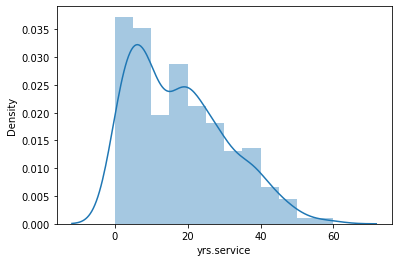

In [ ]:
# Use seaborn package to draw a histogram
sns.distplot(df["yrs.service"])

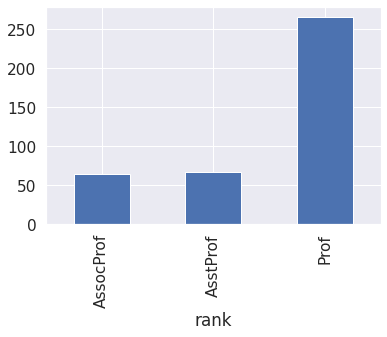

In [ ]:
# Use regular matplotlib function to display a barplot
df.groupby(["rank"])["salary"].count().plot(kind="bar")

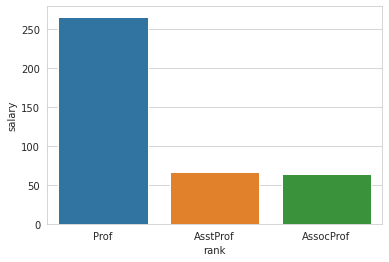

In [ ]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
sns.barplot(x="rank", y ="salary", data=df, estimator=len)


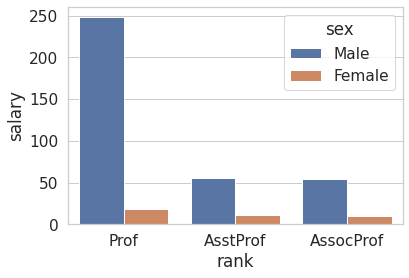

In [ ]:
# Split into 2 groups:
sns.barplot(x="rank",y ="salary", hue="sex", data=df, estimator=len)


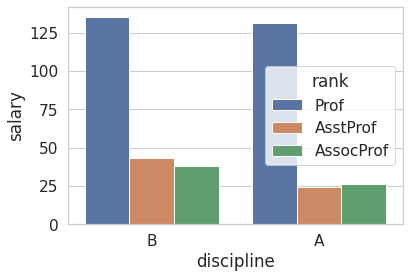

In [ ]:
sns.barplot(x="discipline",y ="salary", hue="rank", data=df, estimator=len)

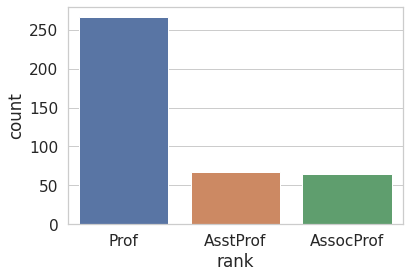

In [ ]:
# countplot
sns.countplot(x="rank", data=df)

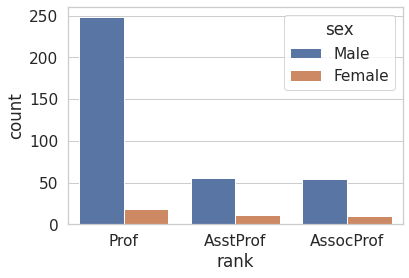

In [ ]:
sns.countplot(x="rank", hue="sex", data=df)

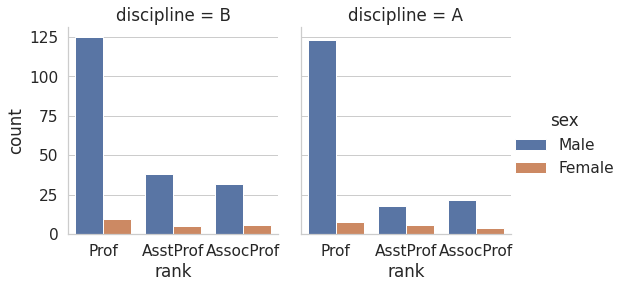

In [ ]:
sns.catplot(x="rank", hue="sex", col="discipline",
                data=df, kind="count",
                height=4, aspect=.9)

There is :  3  non numerical features including : 
 ['rank', 'discipline', 'sex']
-----------------------------------------------------------------------


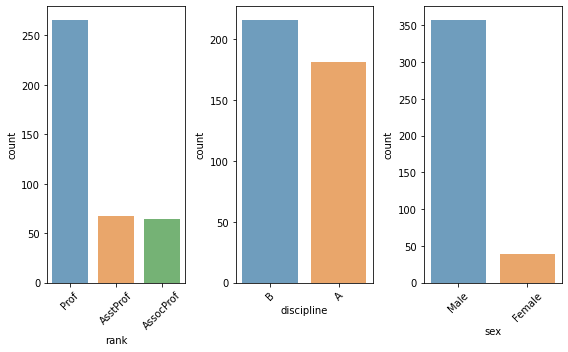

In [ ]:
# For non-numerical features
df_not_num = df.select_dtypes(include = ["O"])
print("There is : ",len(df_not_num.columns) ," non numerical features including : \n",
      df_not_num.columns.tolist())

print("-----------------------------------------------------------------------")
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(8, 5))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()


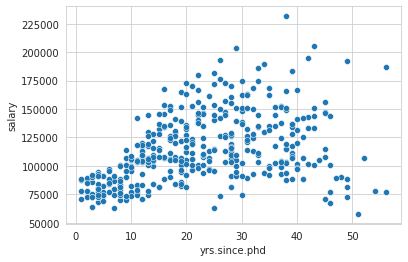

In [ ]:
# Scatterplot
sns.scatterplot(data=df, x="yrs.since.phd", y="salary")

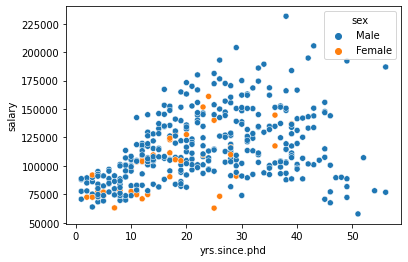

In [ ]:
sns.scatterplot(data=df, x="yrs.since.phd", y="salary", hue="sex")


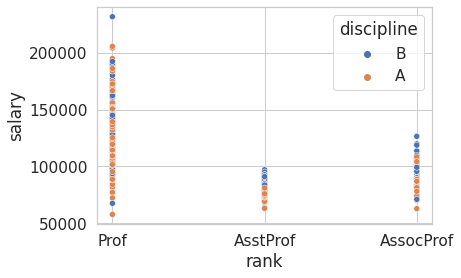

In [ ]:
sns.scatterplot(data=df, x="rank", y="salary", hue="discipline")

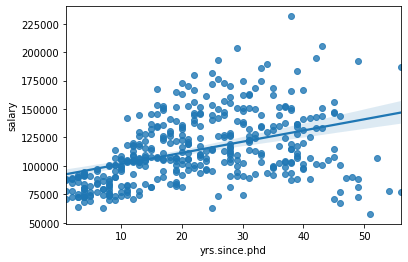

In [ ]:
# When we are interested in linear relationship between two numeric attributes 
# we plot regplot which is best for future predictions.

sns.regplot(x="yrs.since.phd", y="salary", data=df)


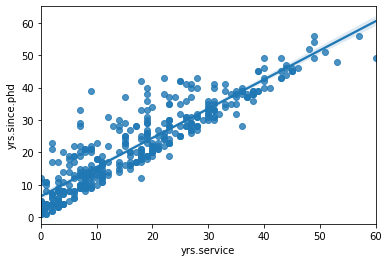

In [ ]:
sns.regplot(x="yrs.service", y="yrs.since.phd", data=df)

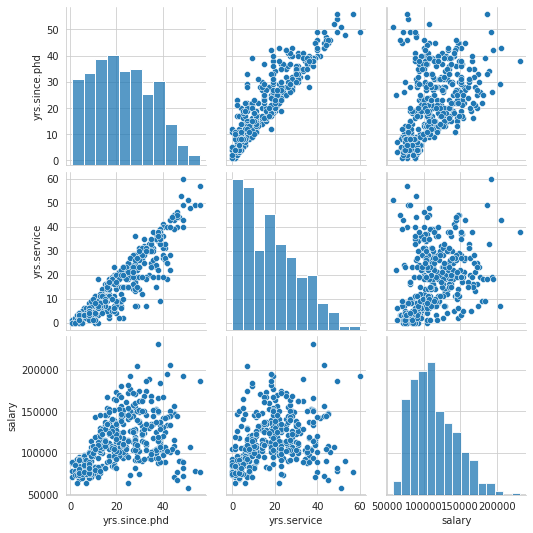

In [ ]:
"""
Let’s complete the visualization by plotting the histogram for all the numeric 
features, so that you can see all the variations in one feature with respect to 
other features. This visualization is very necessary  for understanding the data 
features nature.
"""
# Pairplot 
sns.pairplot(df)


# **Handling Outlier**

Q1  : 
 yrs.since.phd       12.0
yrs.service          7.0
salary           91000.0
Name: 0.25, dtype: float64


Q3  : 
 yrs.since.phd        32.0
yrs.service          27.0
salary           134185.0
Name: 0.75, dtype: float64


IQR : 
 yrs.since.phd       20.0
yrs.service         20.0
salary           43185.0
dtype: float64




<function matplotlib.pyplot.show>

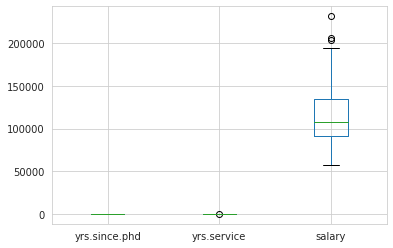

In [ ]:
"""
We know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than 
Q1–1.5IQR or greater than Q3+1.5IQR are consider as outlier.
"""
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Q1  : \n",Q1)
print("\n")
print("Q3  : \n",Q3)
print("\n")
print("IQR : \n",IQR)

print("\n")
df.boxplot()
plt.show


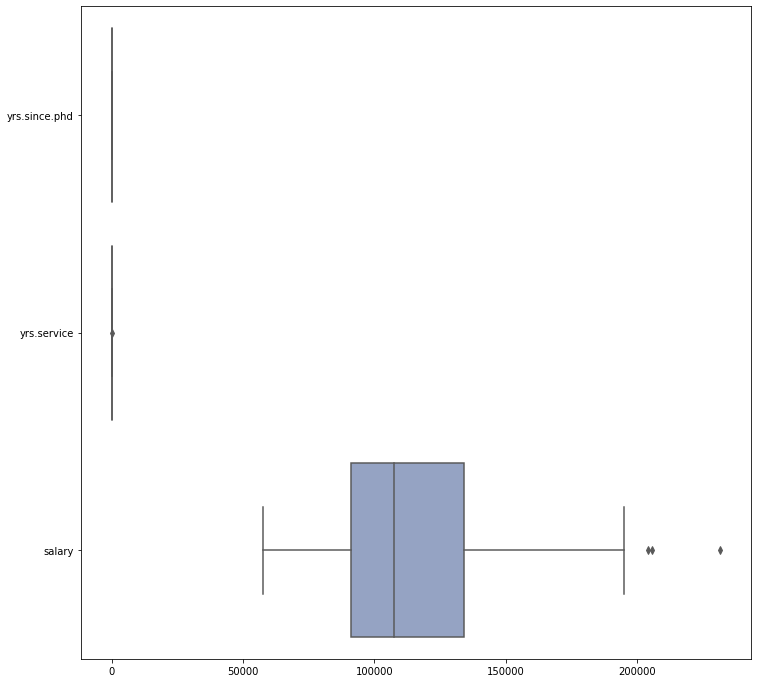

In [ ]:
# boxplot
fig, ax = plt.subplots(figsize=(12,12)) 
sns.boxplot(data=df, orient="h", palette="Set2")


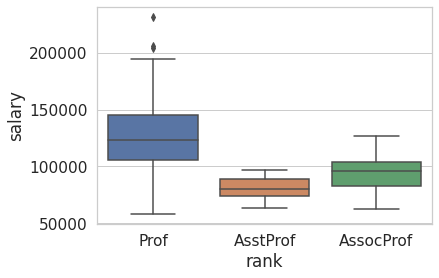

In [ ]:
sns.boxplot(x="rank", y="salary", data=df)


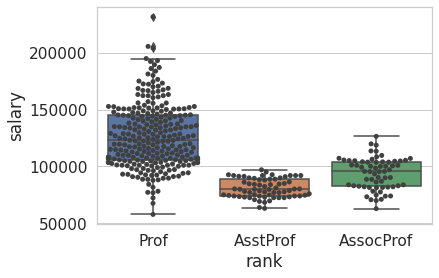

In [ ]:
sns.boxplot(x="rank", y="salary", data=df)
sns.swarmplot(x="rank", y="salary", data=df, color=".25")

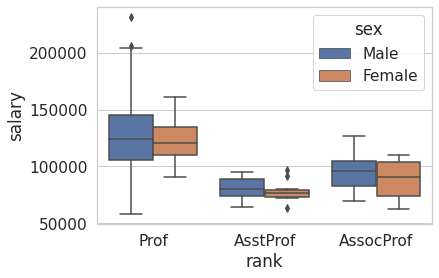

In [ ]:
sns.boxplot(x="rank", y="salary", hue="sex",
                 data=df)

'\nLooking at the box plot, it seems that the variables "salary", have outlier \npresent in the variables. These outliers value needs to be teated and \nthere are several ways of treating them:\n\n1- Drop the outlier value\n2- Replace the outlier value using the IQR\n'

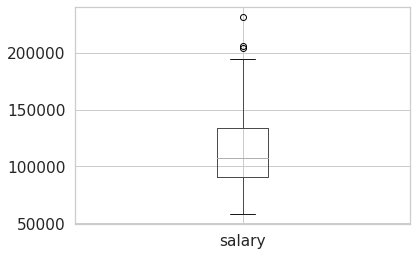

In [ ]:
df.boxplot(column=["salary"])
plt.show

"""
Looking at the box plot, it seems that the variables "salary", have outlier 
present in the variables. These outliers value needs to be teated and 
there are several ways of treating them:

1- Drop the outlier value
2- Replace the outlier value using the IQR
"""

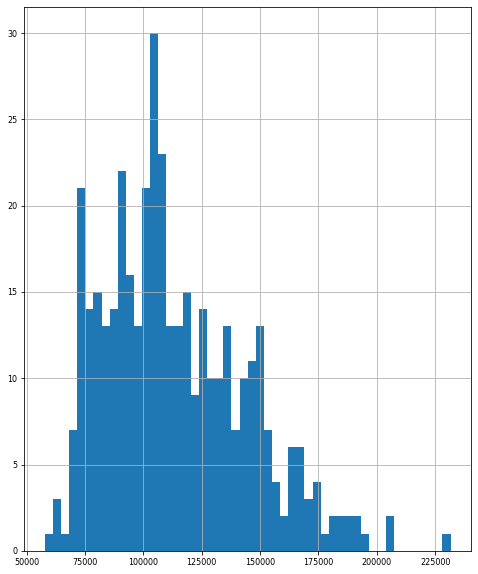

In [ ]:
# Histogram
df["salary"].hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)


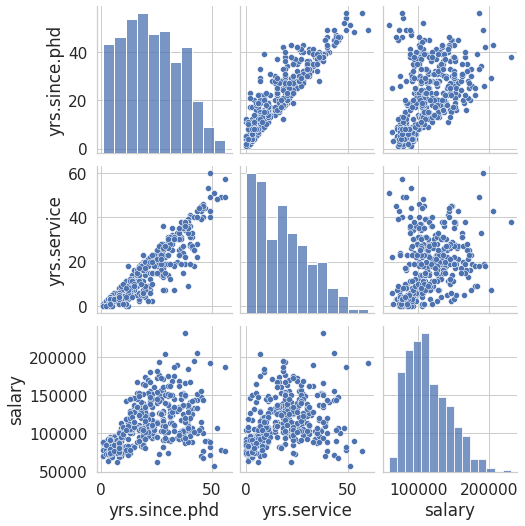

In [ ]:
# Scatterplot 
# Pairplot 
sns.pairplot(df)

shape (before):  (397, 6)
Q1 =  91000.0  Q3 =  134185.0  IQR =  43185.0
shape (after):  (397, 6)




<function matplotlib.pyplot.show>

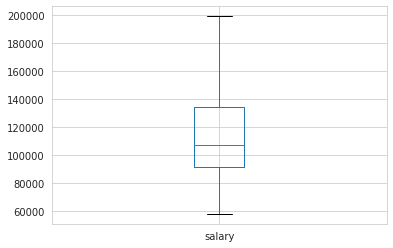

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

df_copy = df.copy()
print("shape (before): ",df_copy.shape)

lower_range, upper_range =  remove_outlier(df_copy["salary"])
df_copy["salary"] = np.where(df_copy["salary"] < lower_range, lower_range, df_copy["salary"]) 
df_copy["salary"] = np.where(df_copy["salary"] > upper_range, upper_range, df_copy["salary"]) 

print("shape (after): ",df_copy.shape)
print("\n")
df_copy.boxplot(column=["salary"])
plt.show


shape (before):  (397, 6)
shape (after):  (351, 6)




<function matplotlib.pyplot.show>

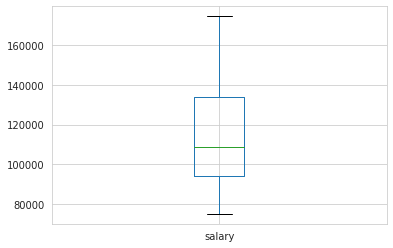

In [ ]:
"""
Trimming :
In this method, we completely remove data points that are outliers.
"""
min = 75000
max = 175000

df_copy = df.copy()
print("shape (before): ",df_copy.shape)

index = df_copy[(df_copy["salary"] >= max)|(df_copy["salary"] <= min)].index
df_copy.drop(index, inplace=True)

print("shape (after): ",df_copy.shape)

print("\n")
df_copy.boxplot(column=["salary"])
plt.show

median =  107300.0




<function matplotlib.pyplot.show>

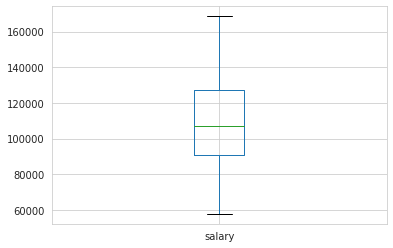

In [ ]:
"""
Replacing Outliers with Median Values
In this technique, we replace the extreme values with median values. 
It is advised to not use mean values as they are affected by outliers.
"""

df_copy = df.copy()
median = df_copy["salary"].quantile(0.50)
print("median = ",median)
max_outlier_val = df_copy["salary"].quantile(0.95)

df_copy["salary"] = np.where(df_copy["salary"] > max_outlier_val, median,  df_copy["salary"])

print("\n")
df_copy.boxplot(column=["salary"])
plt.show


Mean :  113706.45843828715
Median :  107300.0
Missing values :  0
% of Missing values :  0.0




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


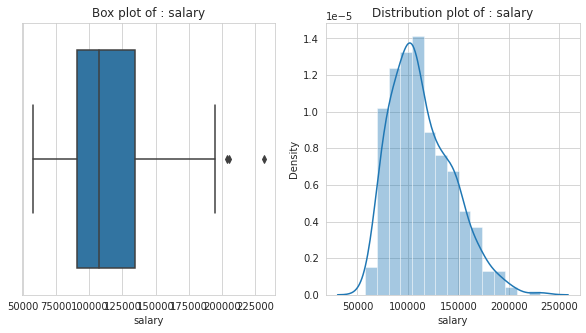

In [ ]:
# Analyze individual column
import matplotlib.pyplot as plt

def plotchart(col, name):
    fix, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    sns.boxplot(col,orient="v", ax = ax1)
    ax1.set_ylabel= name+""
    ax1.set_title("Box plot of : "+name)
    sns.distplot(col, ax=ax2)
    ax2.set_title("Distribution plot of : "+ name)

def analysis_column(col, name):
    print("Mean : ",col.mean())
    print("Median : ",col.median())
    print("Missing values : ",col.isnull().sum())
    print("% of Missing values : ",round(100*(col.isnull().sum()/len(col)),2))
    print("\n")
    plotchart(col, name)

analysis_column(df["salary"], "salary")


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


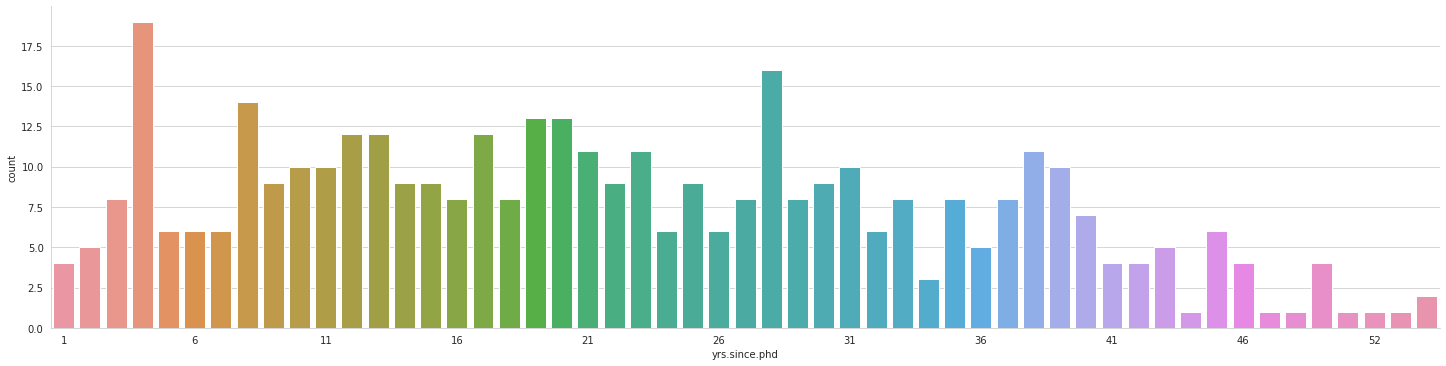

In [ ]:
plt = sns.factorplot("yrs.since.phd", data=df, aspect=4, kind="count")
plt.set_xticklabels(step=5)